# Practica 3: Visualizacion de datos

1. En este ejercicio utilizamos los datos de `gapminder` (recordar el ejercicio 10 de la Práctica 2 para acceder a los datos de `gapminder`).
    
    (a) Utilizando `seaborn.objects`, graficar la curva de la expectativa de vida en Argentina en función del año, completando el siguiente código.
    
     **Sugerencia**: recordar de la práctica anterior como filtrar datos de un dataset.

In [2]:
from gapminder import  gapminder
import seaborn.objects as so
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

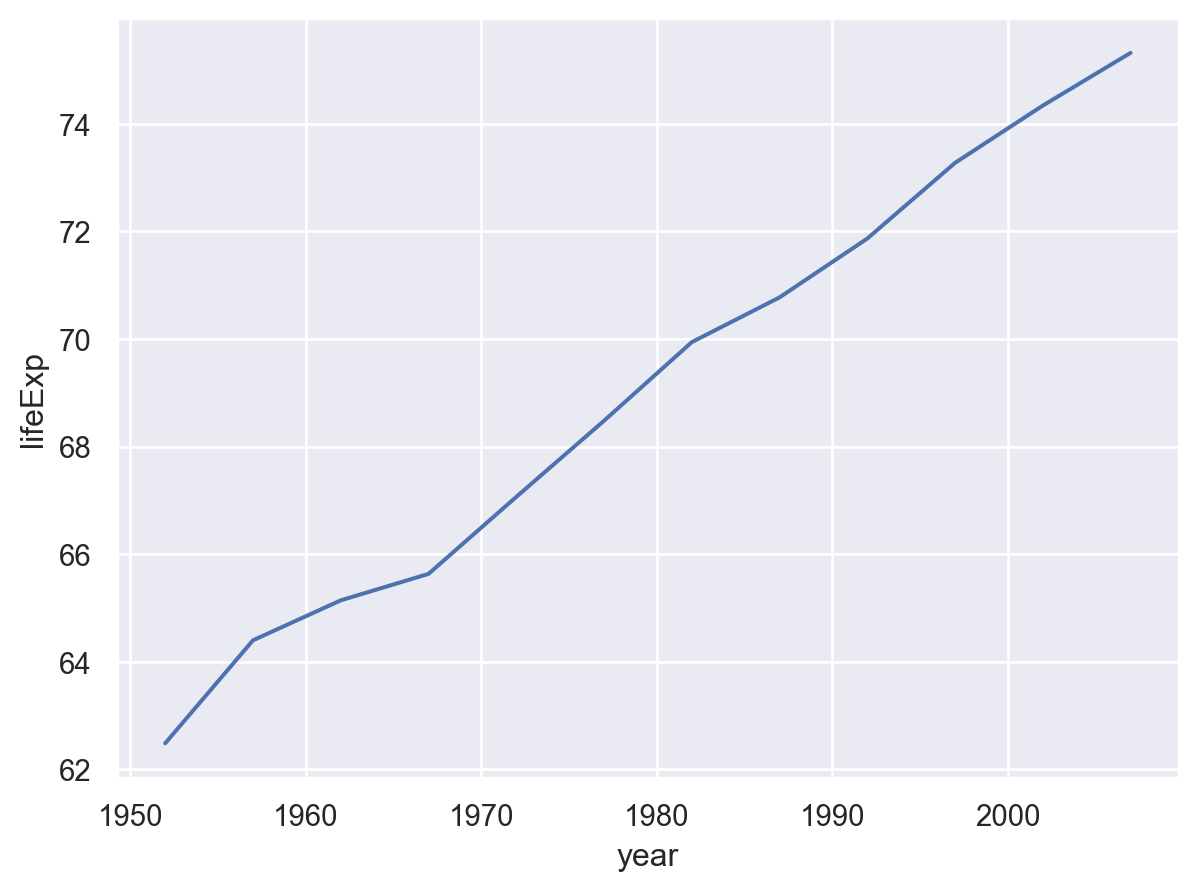

In [7]:
datosArgentina = gapminder[gapminder["country"] == "Argentina"]
(
    so.Plot(data = datosArgentina, x = "year", y = "lifeExp")
    .add(so.Line())
)

1. (b) Realizar un nuevo gráfico donde puedan verse las curvas de la expectativa de vida de los
paı́ses de América en función del año, una curva por cada paı́s.
Sugerencia: utilizar los parámetros `group = ???` o `color = ???`. ¿Cuál es la diferencia
entre los dos? 

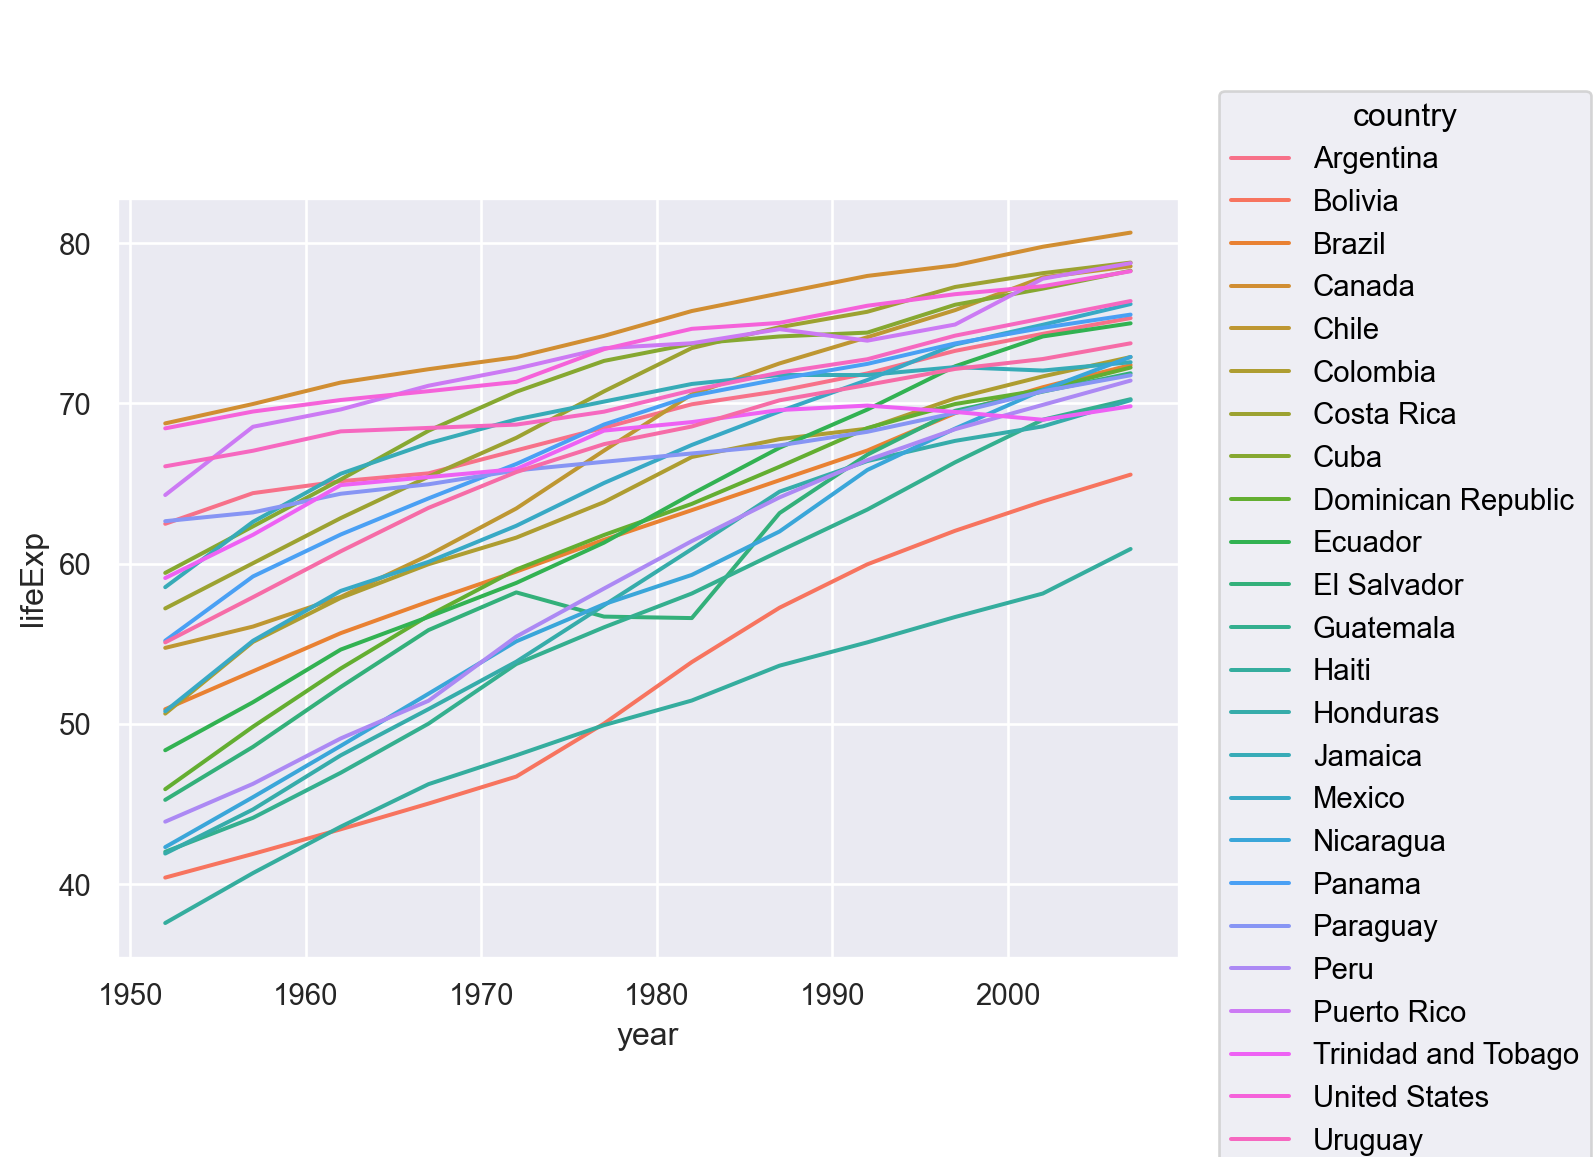

In [ ]:
datosAmerica = gapminder[gapminder["continent"] == "Americas"]
(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp", color="country")
    .add(so.Line())
)

Gaga.

1. (c) Queremos agregar al gráfico del ı́tem anterior una curva de tendencia lineal utilizando
el método `.add(so.Line(), so.PolyFit(1))`. ¿Cuál de las siguientes dos formas de
agrupar los datos es la forma correcta? Explicar la diferencia entre los dos códigos.

Esta primer forma hace un PolyFit de cada uno de los paises, individualmente.

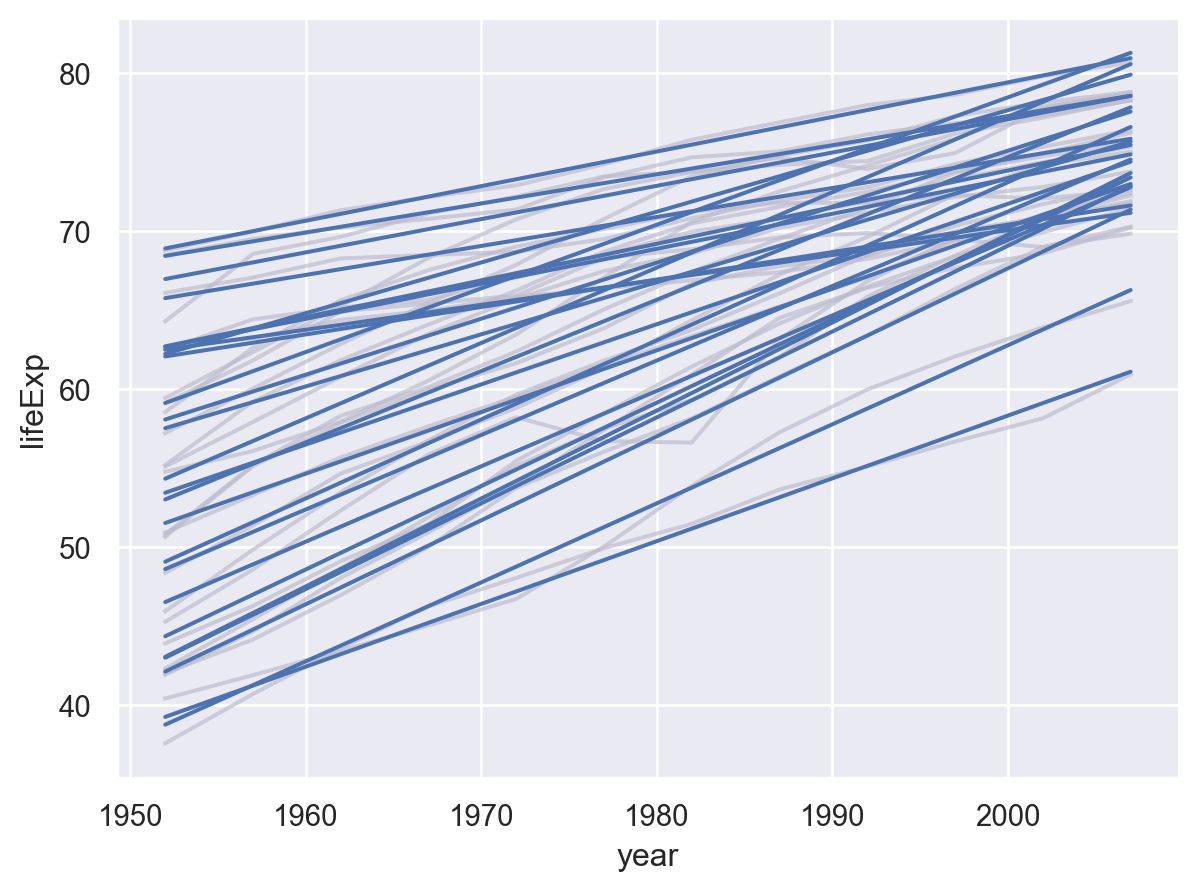

In [ ]:
(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp", group = "country")
    .add(so.Lines(color = "#bbca"))
    .add(so.Line(), so.PolyFit(1))
)

Sin embargo, esta otra hace un PolyFit de todas las lineas. Esta es la correcta.

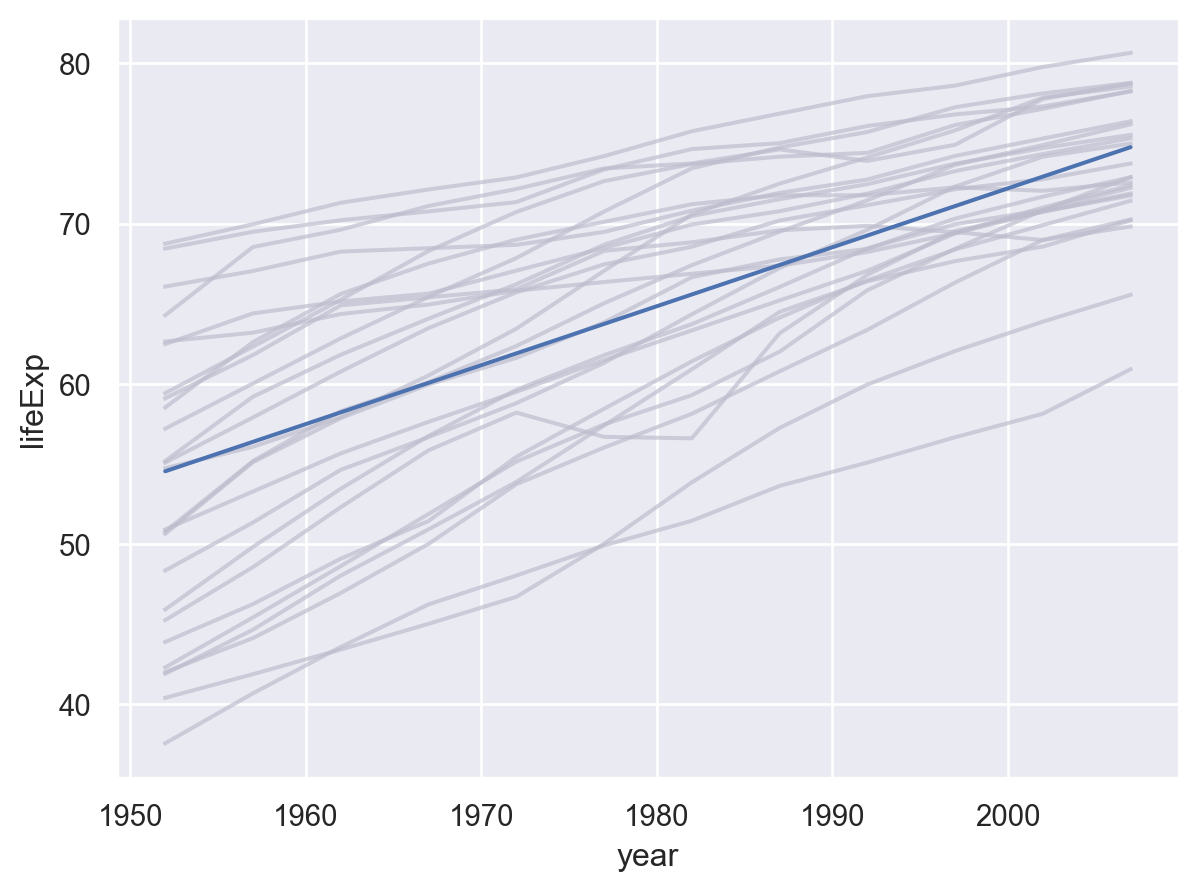

In [9]:

(
    so.Plot(data = datosAmerica, x = "year", y = "lifeExp")
    .add(so.Lines(color="#bbca"), group = "country")
    .add(so.Line(), so.PolyFit(1))
)

1. (d) Realizar los graficos en la guia:

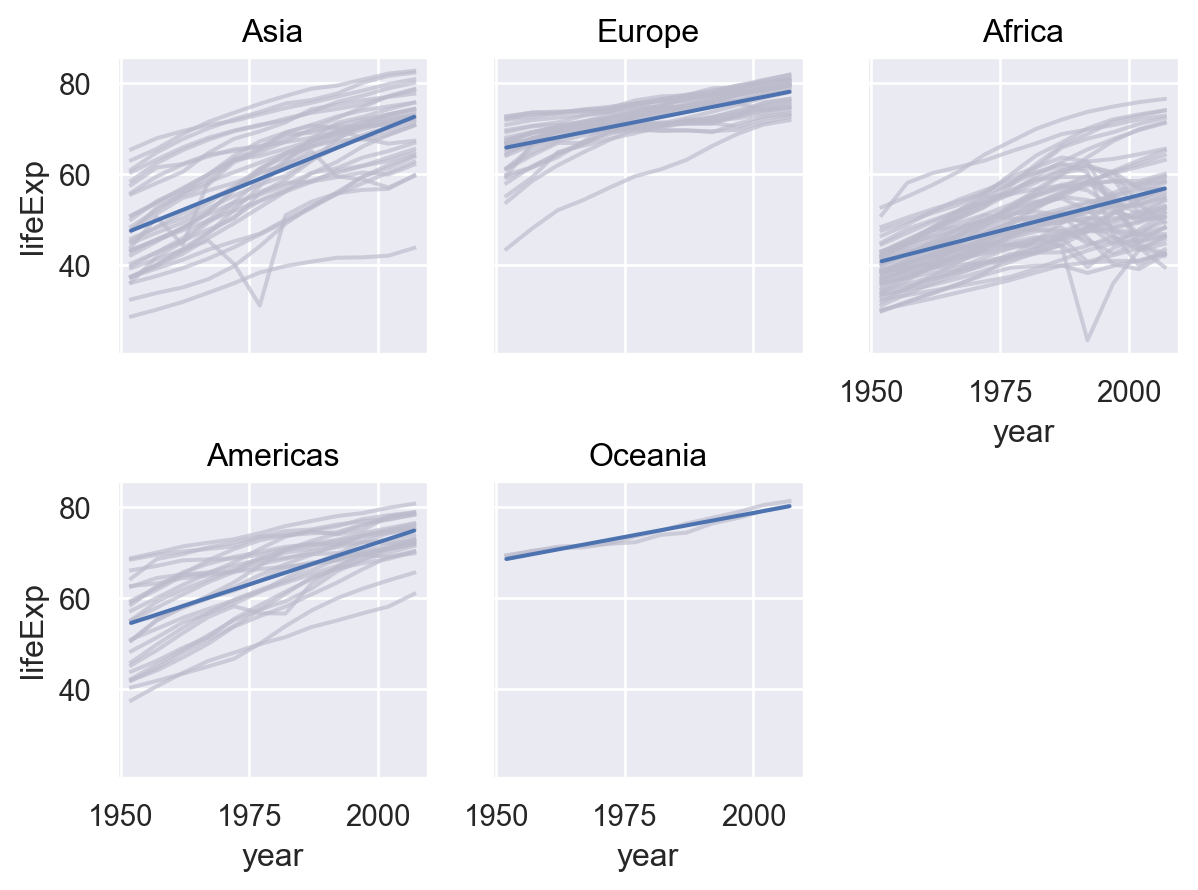

In [ ]:
(
    so.Plot(data=gapminder, x = "year", y = "lifeExp")
    .add(so.Lines(color="#bbca"), group = "country")
    .add(so.Line(), so.PolyFit(1))
    .facet("continent", wrap=3) 
    # facet(col=None, row=None, order=None, wrap=None)
    # Produce subplots with conditional subsets of the data
    # wrap : int
    # When using only col or row, wrap subplots across a two-dimensional grid with this many subplots on the faceting dimension.

)

2. En los siguientes ejercicios vamos a trabajar con el dataset `penguins` disponible en la biblioteca
`seaborn`. ¿Cuantas filas y columnas hay en el dataset `penguins`?

In [3]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [15]:
penguins.shape

(344, 7)

3. Como vimos en el Ejercicio 1(c), si asignamos una codificacion (o mapeo) al definir un `Plot()`,
el mapeo se asigna en todas las capas de marcas (objetos mark). En cambio, si asignamos una
codificacion dentro del metodo `add()` de una marca, el mapeo se realiza solo en esa capa. Por
ultimo, si asignamos un parametro de la marca, el valor se asigna directamente.

    ¿Que resultado esperan para el siguiente grafico? ¿Cuales codificaciones se pasan de `Plot()`
a `Dot()` y cuales no pueden pasarse? ¿Cuales codificaciones se establecen en `Dot()`? ¿Cuales
variables estan asignadas directamente en `Dot()`? ¿De que color van a pintarse los puntos?

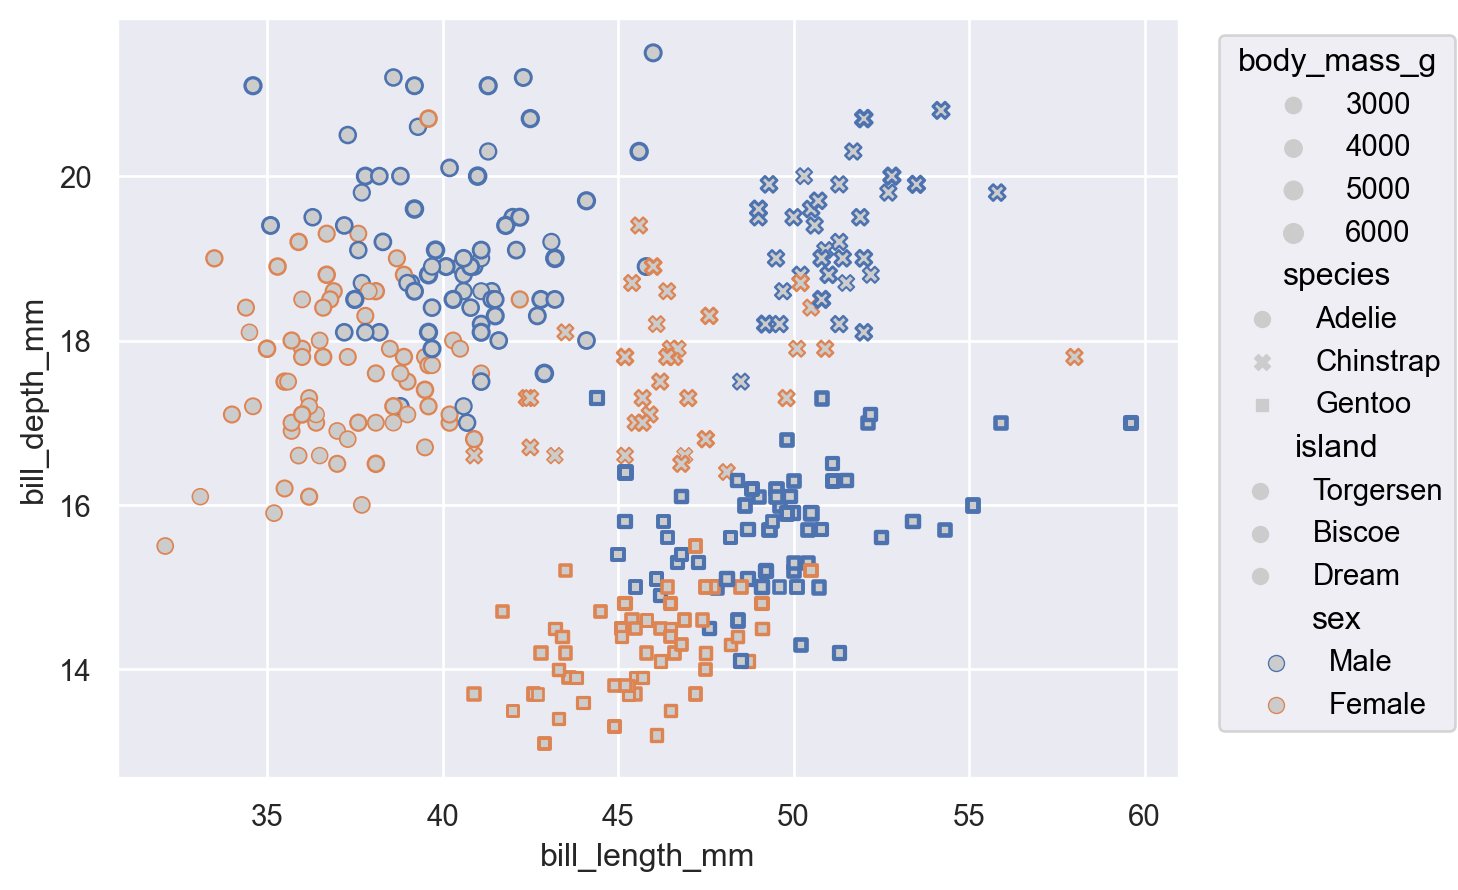

In [28]:
(
    # edgewidth define la variable que controla el tamaño de los puntos
    # marker define la variable que controla el estilo de cada punto
    # linestyle, quizas grosor.
    # color, no noto cambios
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgewidth="body_mass_g", marker = "species",
        linestyle = "island", color = "species"
    )
    # color definido asi, le gana al color definido arriba.
    # edgecolor se usa para este layer.
    .add(so.Dot(color=".8"), edgecolor="sex")
)

4. (a) Hacer un grafico de dispersion de `bill_depth_mm` (en el eje x) vs. `bill_length_mm` (en
el eje y)

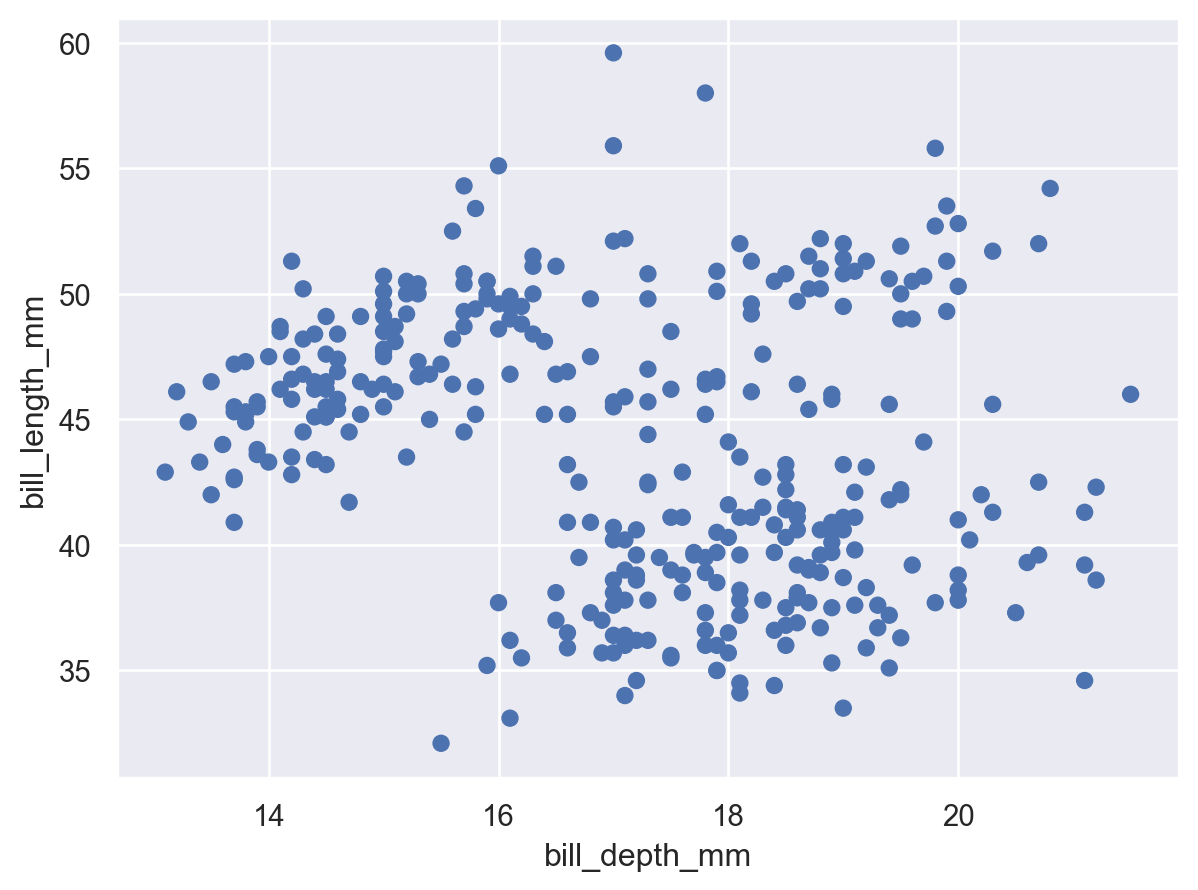

In [29]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm")
    .add(so.Dot())
)

4. (b) ¿Distinguen grupos distintos de puntos en el grafico? ¿A que puede deberse?

Lo mas probable es que sea por especies, como vimos arriba, los markers estan bien separados en clusters, aunque sean macho y hembra.

4. (c) Introducir alguna modificación en el gráfico anterior para verificar o refutar su conjetura
del ı́tem anterior.

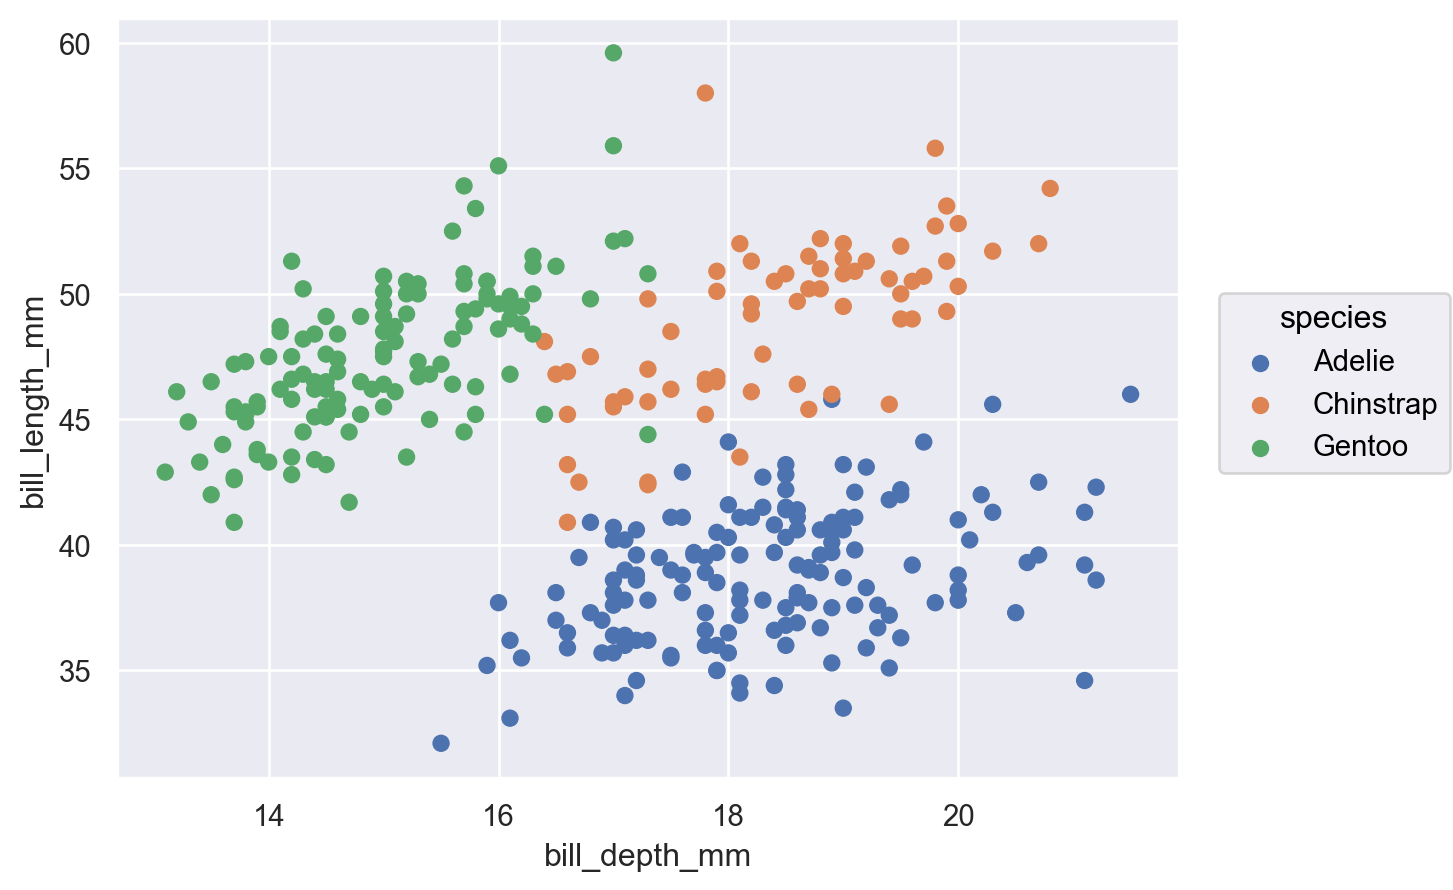

In [32]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", color="species")
    .add(so.Dot())
)

5. (a) Rehacer el grafico del Ejercicio 4(a), coloreando los puntos segun el sexo. ¿Que se
observa?

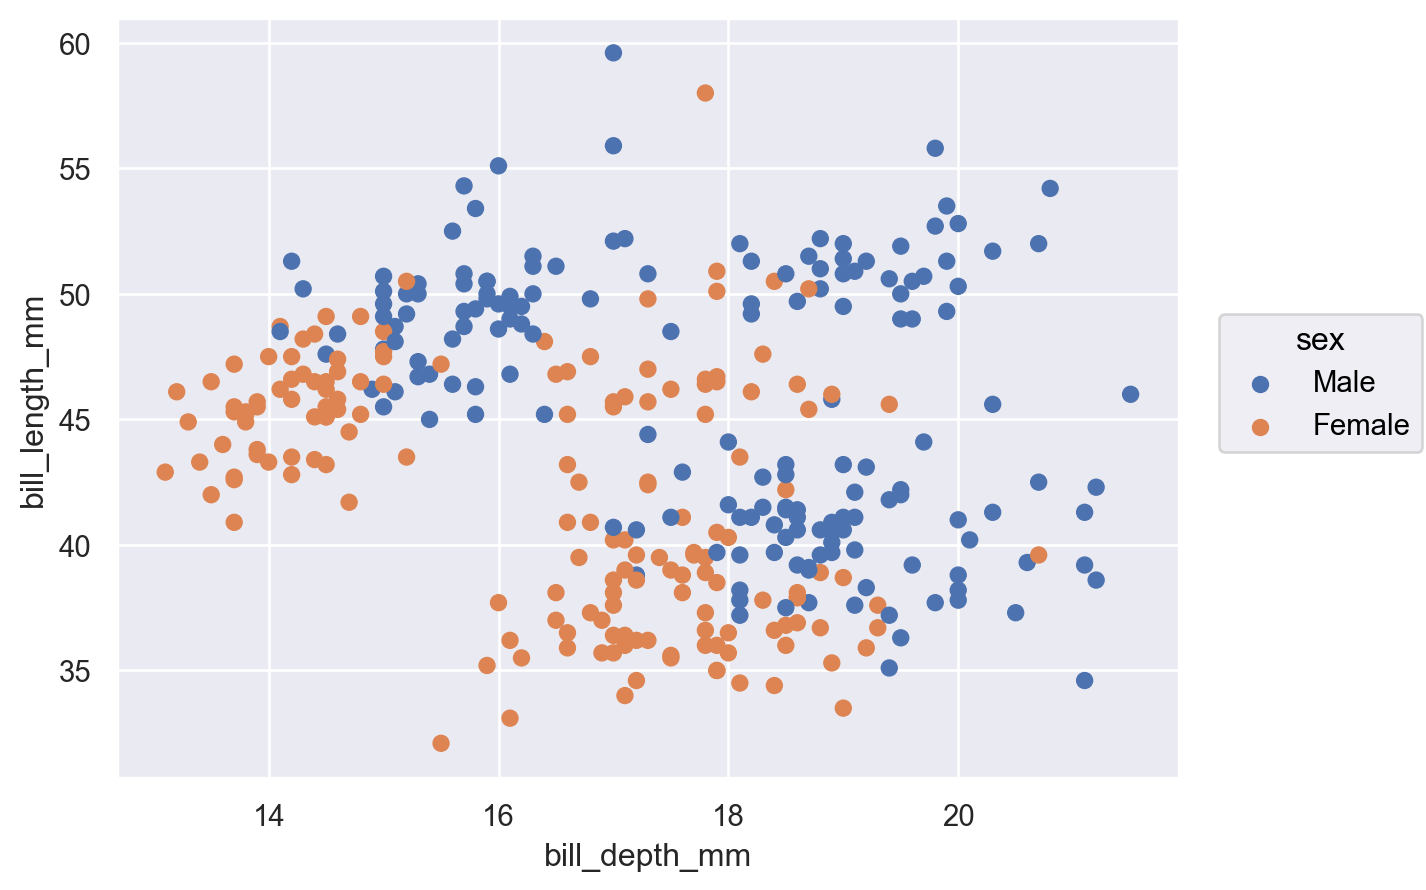

In [33]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", color="sex")
    .add(so.Dot())
)

Se observa que las hembras siempre tienen menor ancho y profundidad de pico que los machos de su misma especie. 

5. (b) Usando la funcion `facet()` separar el grafico del item anterior en tres subgraficos, uno
para cada especie.

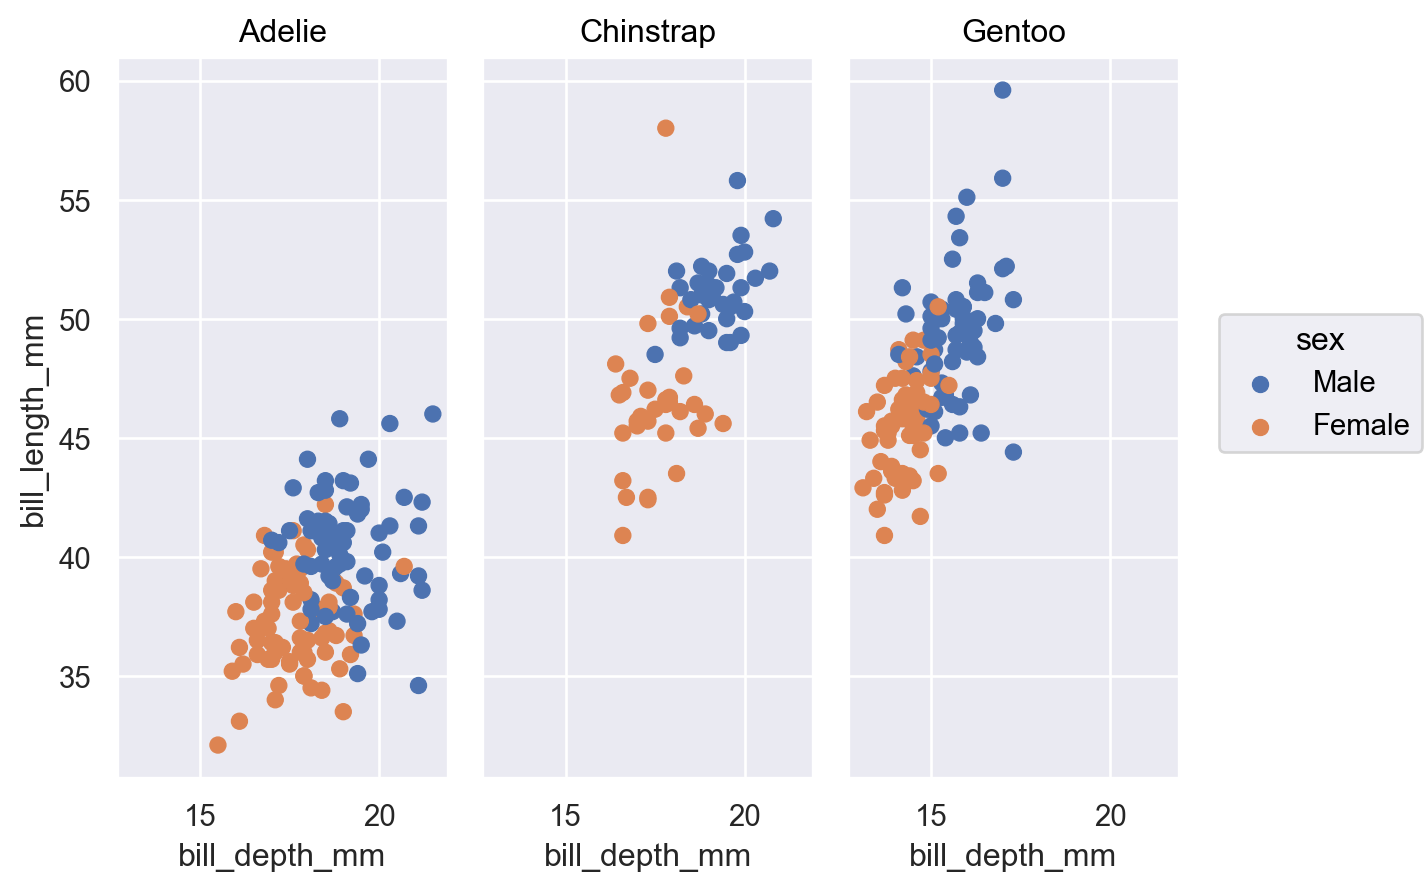

In [34]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", color="sex")
    .add(so.Dot())
    .facet("species")
)

6. (a) ¿Cuantos pinguinos se registraron en cada isla en la base de datos? Recordar los comandos
`groupby()` y `size()` de la practica anterior.

In [95]:
penguins.groupby("island").size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

6. (b) Realizar un grafico de barras con la cantidad de pingunos en cada isla, completando el
siguiente codigo.

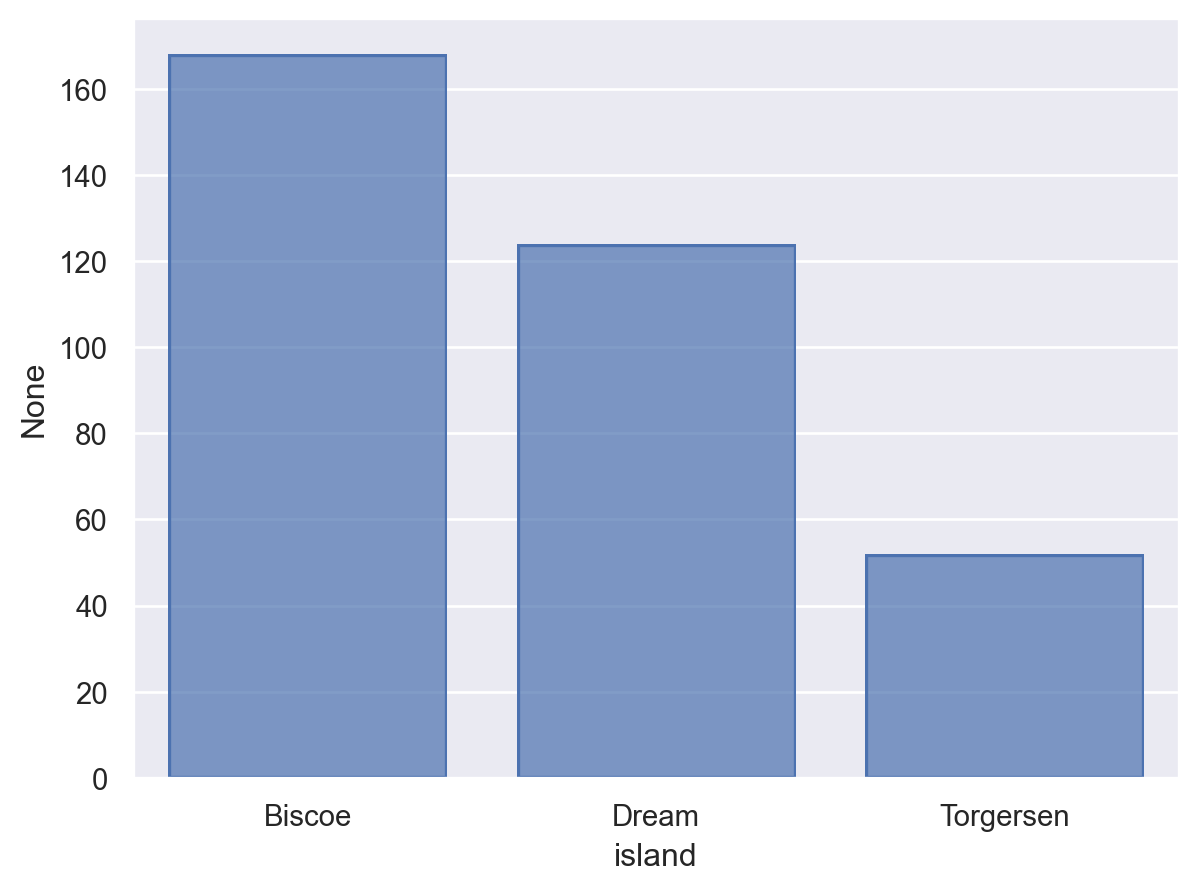

In [55]:
pinguinos_por_isla = penguins.groupby("island").size() # Usar el codigo del item anterior .
(
    so.Plot(x = pinguinos_por_isla.index, y = pinguinos_por_isla)
    .add(so.Bar()) 
)

6. (c) El grafico que acabamos de hacer es un histograma categorico (usamos una variable
categorica en el eje X). Podemos realizar el mismo grafico usando la funcion `Hist()` para
contar automaticamente las cantidades (sin definir una variable `pinguinos_por_isla`).
Completar el siguiente codigo.

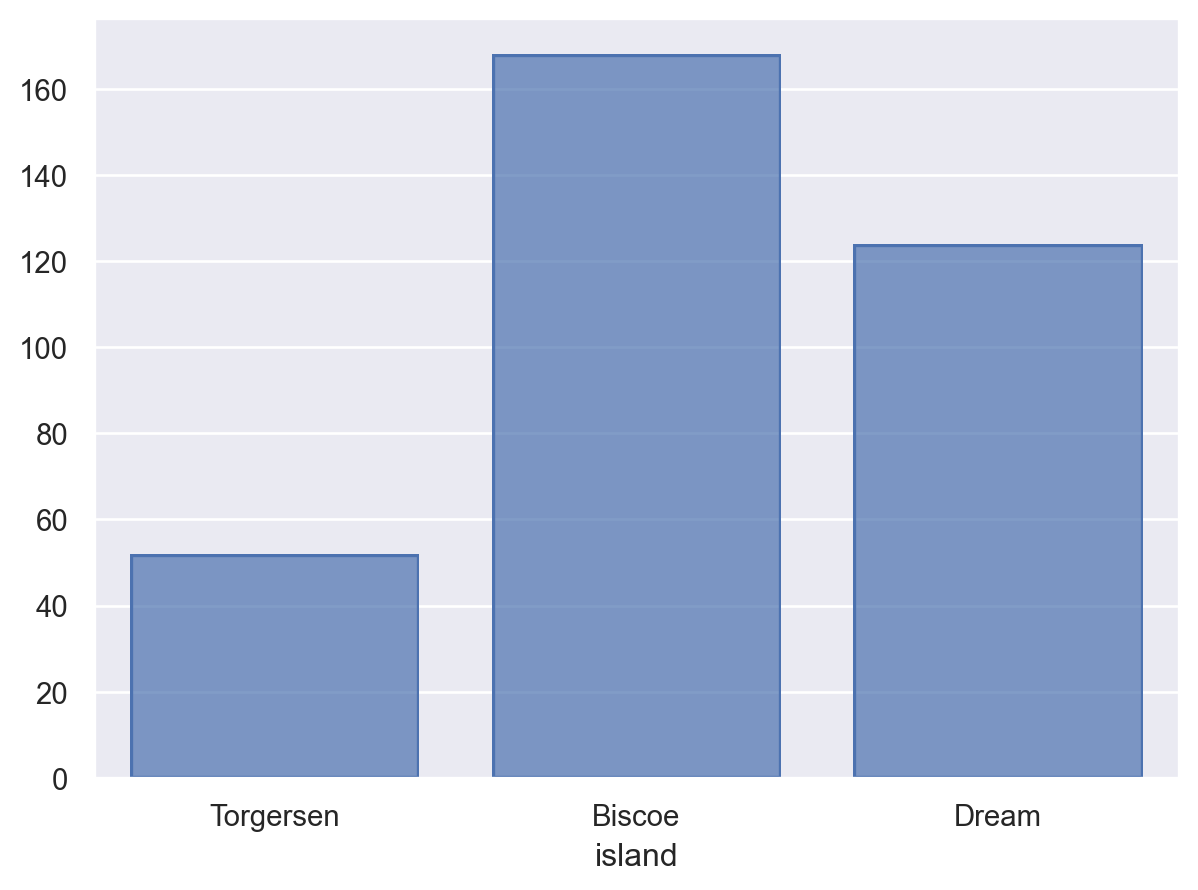

In [64]:
(
    so.Plot(data=penguins, x="island")
    .add(so.Bar(), so.Hist())
)

6. (d) ¿Por que no especificamos ninguna variable y en el ultimo grafico?

Porque estamos comparando variable categorica con variable numerica.

6. (e) Queremos ver en un grafico cuantos pinguinos de cada especie hay en cada isla, ¿como
podemos hacerlo? Si usan un grafico de barras, pueden utilizar la funcion `Dodge()` para
hacer barras distintas por categorıa.

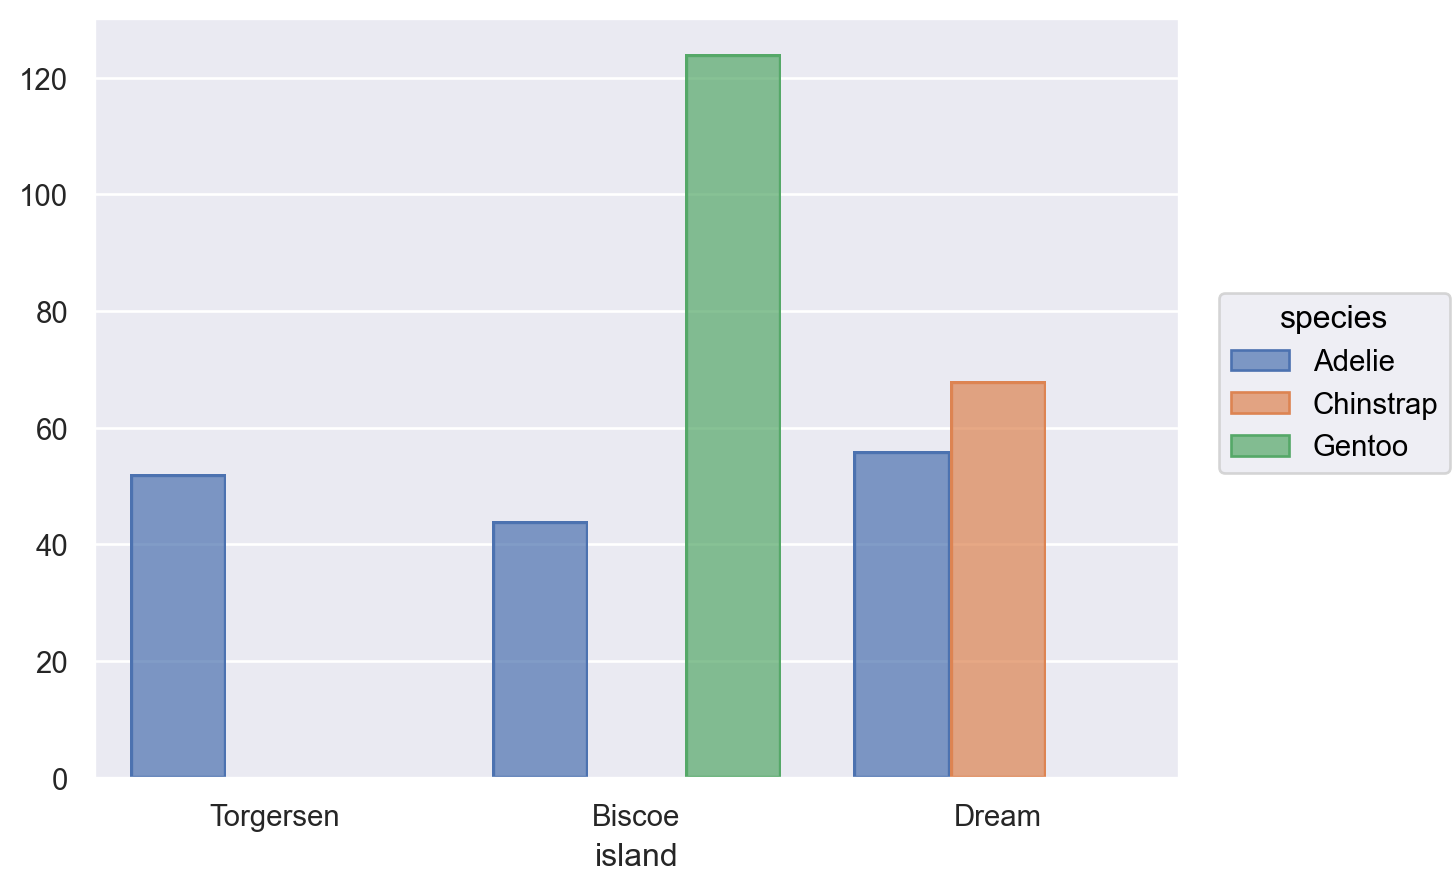

In [69]:
(
    so.Plot(data=penguins, x="island") # es lo mismo si pongo el color aca (en este caso!)
    .add(so.Bar(), so.Hist(), so.Dodge(), color="species")
)

6. (f) ¿Como podrıan visualizar lo mismo usando `facet()`?

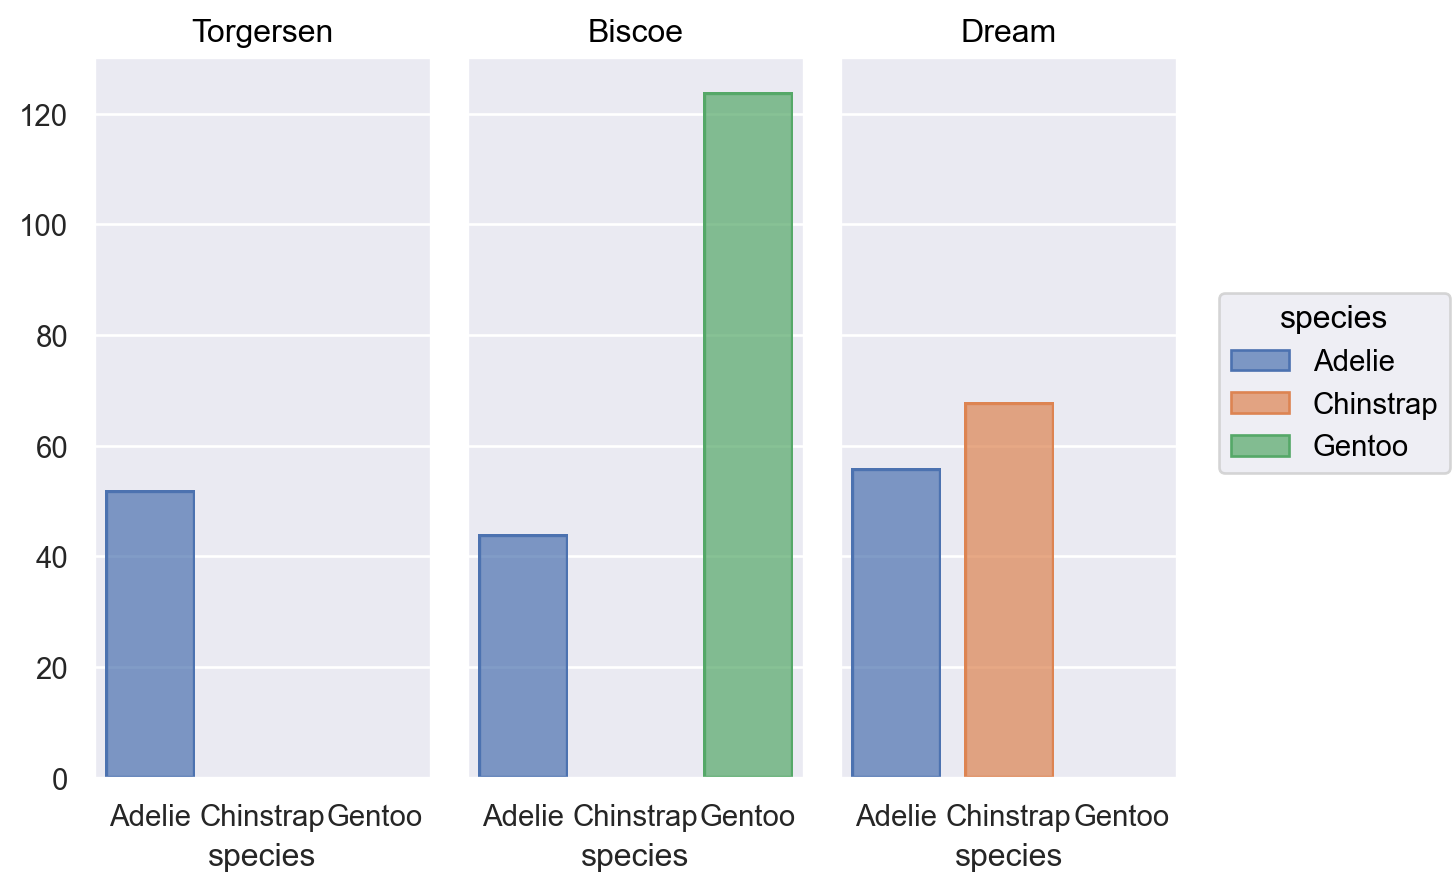

In [88]:
(
    so.Plot(data=penguins, x="species")
    .add(so.Bar(), so.Hist(), color="species")
    .facet("island")
)

# queda medio gaga, como que las columnas no ocupan el grosor que deberian ocupar.
# sol: era sacar el so.Dodge(), no habia nada que esquivar si separo con facet.

7. Realizar un histograma de la cantidad de pinguinos en funcion del tamaño del ala (`flipper_length_mm`). A partir del grafico, estimar el valor mınimo, maximo, la media y la
mediana. Verificar sus estimaciones utilizando los comandos apropiados.

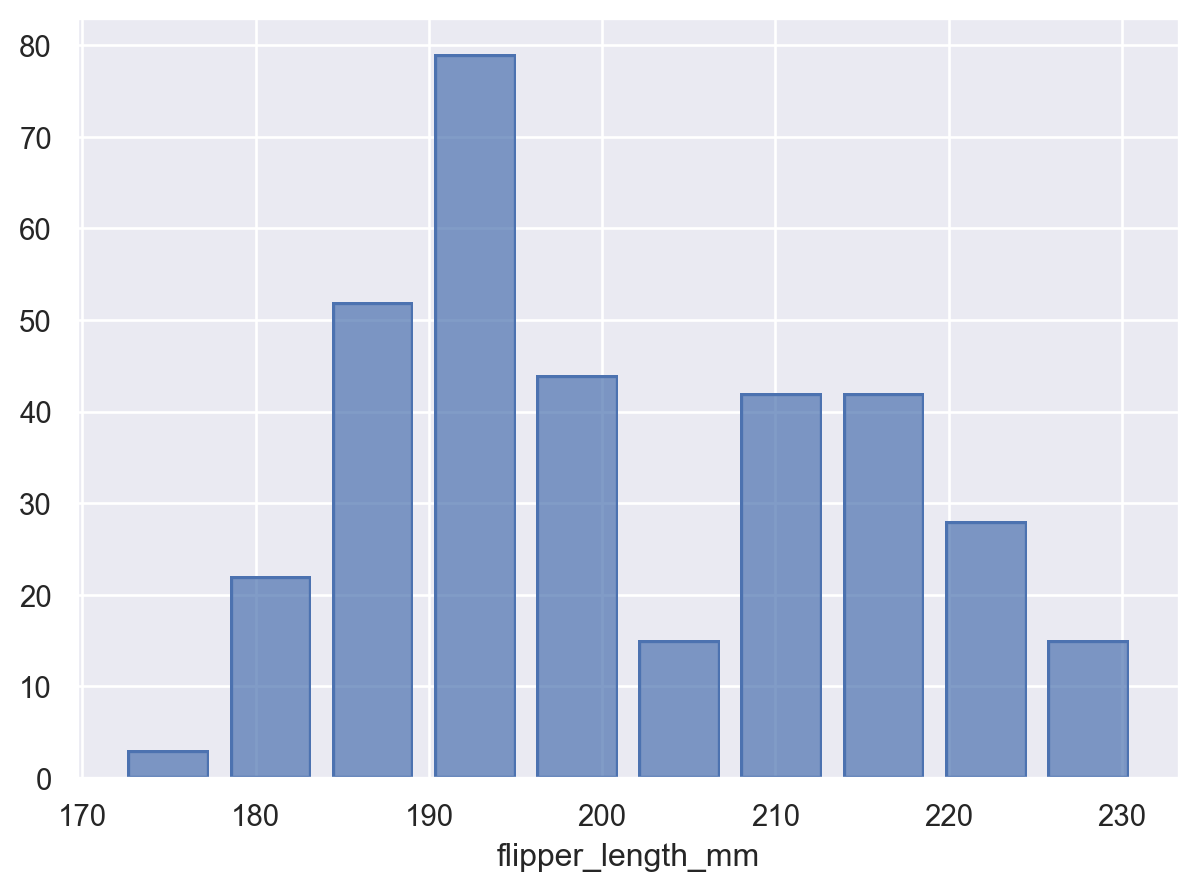

In [91]:
(
    so.Plot(data=penguins, x="flipper_length_mm")
    .add(so.Bar(), so.Hist())
)

De la observacion del grafico, podemos decir que el largo minimo de ala es ~170mm y el maximo es ~230mm. La media debe estar entre 180 y 190 seguramente, ya que hay bastantes pinguinos con un largo aproximado de 180-190mm, pero la mediana debe estar en ~200mm. Verifiquemos si le erre astronomicamente:

In [92]:
largo_ala = penguins["flipper_length_mm"]
print("Minimo: ", largo_ala.min(), "mm")
print("Maximo: ", largo_ala.max(), "mm")
print("Media: ", largo_ala.mean(), "mm")
print("Mediana: ", largo_ala.median(), "mm" )

Minimo:  172.0 mm
Maximo:  231.0 mm
Media:  200.91520467836258 mm
Mediana:  197.0 mm


Solo malinterprete la media, que resulto ser mas grande que la mediana. 

8. (a) Calcular distintos estadısticos de la variable `bill_depth_mm` (mınimo, maximo, media,
...).

In [93]:
profundidad_pico = penguins["bill_depth_mm"]
print("Minimo: ", profundidad_pico.min(), "mm")
print("Maximo: ", profundidad_pico.max(), "mm")
print("Media: ", profundidad_pico.mean(), "mm")
print("Mediana: ", profundidad_pico.median(), "mm" )

Minimo:  13.1 mm
Maximo:  21.5 mm
Media:  17.151169590643278 mm
Mediana:  17.3 mm


8. (b) Segun lo observado en el Ejercicio 4, ¿esos valores varıan segun la especie? ¿Como
podemos usar graficos `BoxPlot` para para ver la relacion entre species y `bill_depth_mm`?

Si, la profundidad del pico varia en base a la especie. Recordemos el grafico que mejor muestra esto:

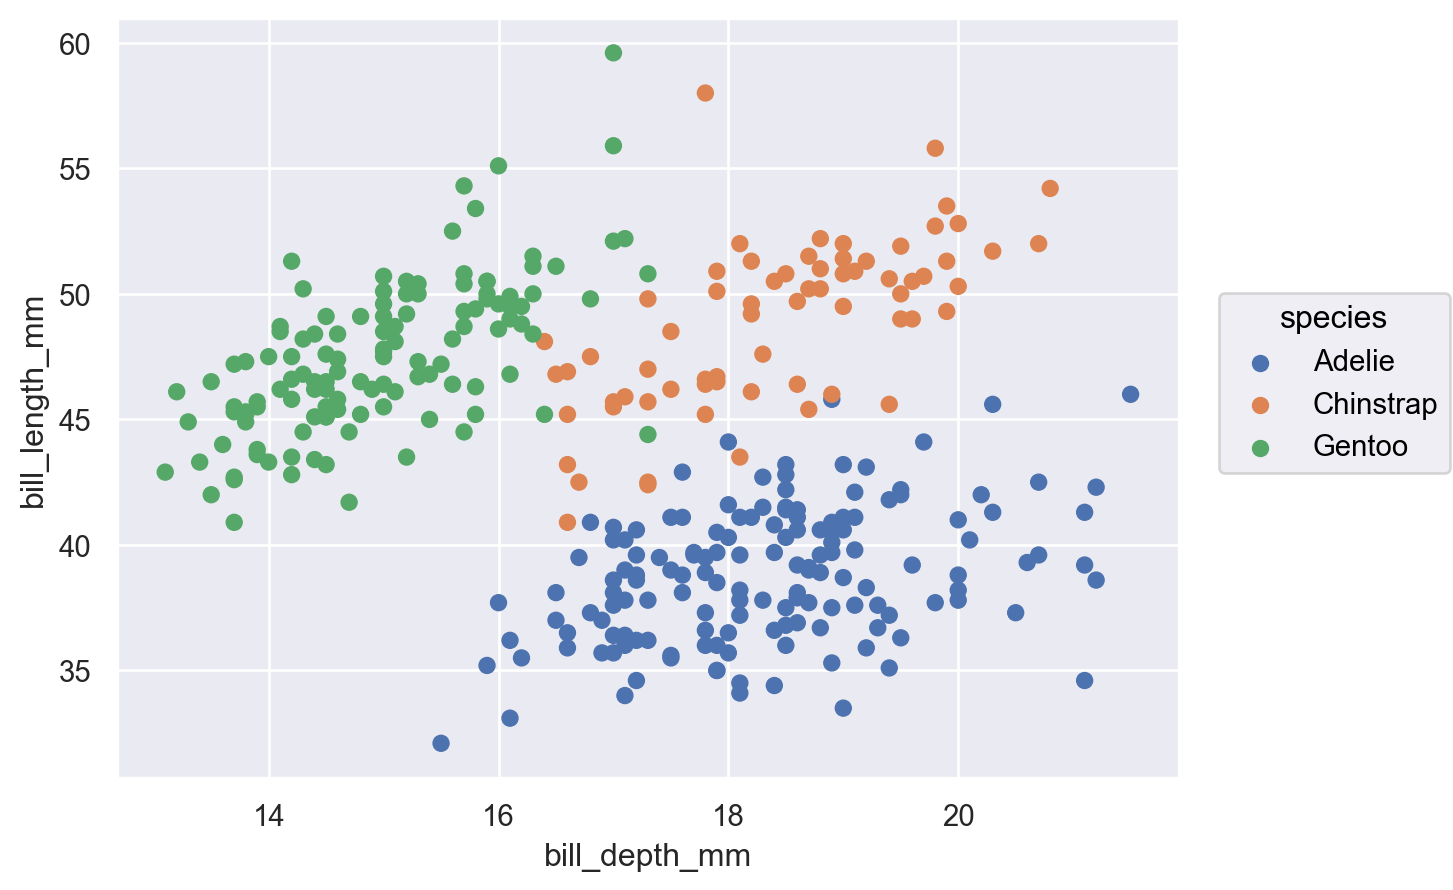

In [96]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", color="species")
    .add(so.Dot())
)

Notar que la especie *Gentoo* tiene menor media de profundidad de pico que las otras dos especies. En cambio, las especies *Adelie* y *Chainstrap* parecerian compartir media de profundidad de pico. Usemos graficos BoxPlot para mostrar esto.

[]

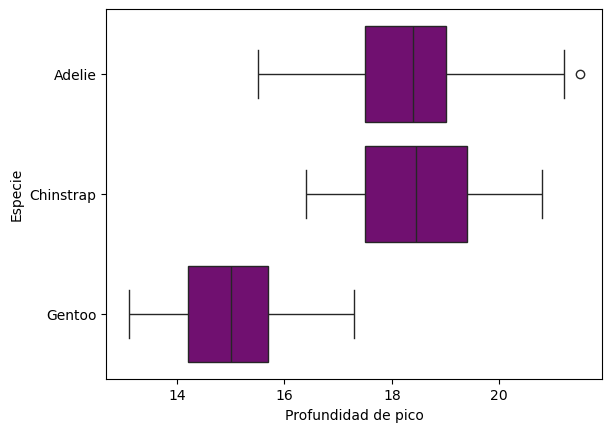

In [119]:
import matplotlib.pyplot as plt

(
    # ver documentacion de seaborn.boxplot para mas ejemplos, usan el de titanic ahi
    sns.boxplot(data = penguins, x = "bill_depth_mm", y = "species", 
                color="purple") 
    .set(xlabel="Profundidad de pico", ylabel="Especie")
)
plt.plot()

Se ve claramente que cumple la hipotesis que hicimos anteriormente.

9. (a) Rehacer el scatter plot del Ejercicio 4, modificando el tamaño de los puntos según el
peso de cada pingüino, utilizando el parámetro `pointsize="???"`. ¿Qué se observa?

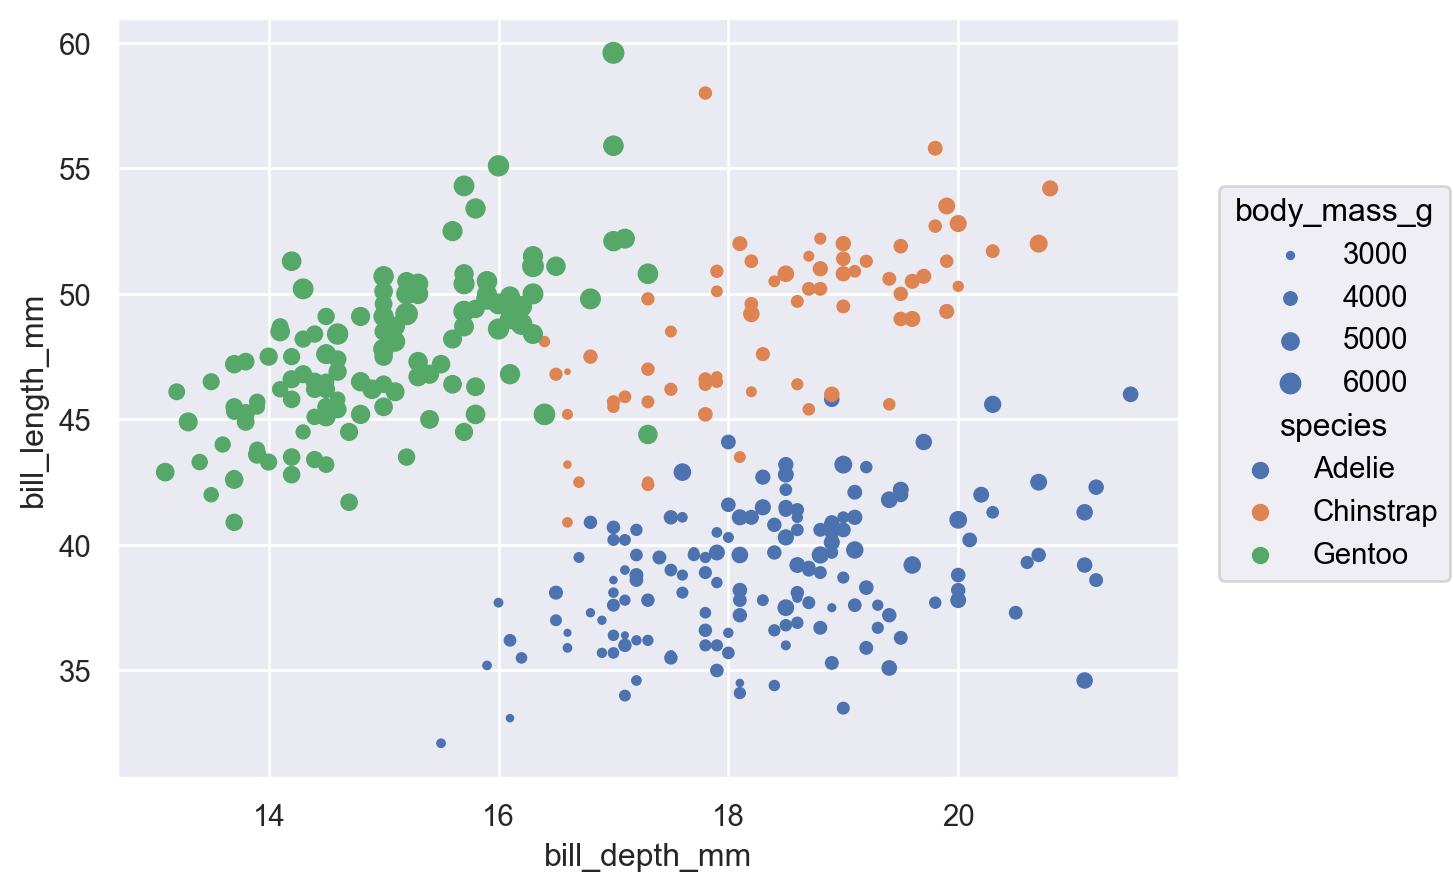

In [120]:
(
    so.Plot(penguins, x="bill_depth_mm", y="bill_length_mm", 
            pointsize="body_mass_g", color="species")
    .add(so.Dot())
)

9. (b) En base a lo observado, ¿cuál es la especie con mayor peso? Verificarlo mediante alguna
visualización.

Se nota por lejos que los mas bonitos y **gorditos** son los de la especie *Gentoo*. Veamoslo con un BoxPlot:

[]

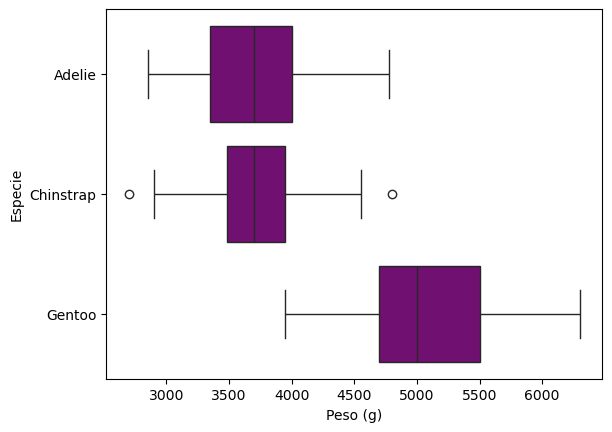

In [121]:
(
    sns.boxplot(data = penguins, x = "body_mass_g", y = "species", 
                color="purple")
    .set(xlabel="Peso (g)", ylabel = "Especie")
)
plt.plot()

En efecto, la media de peso para la especie *Gentoo* es de 5000g aproximadamente, mientras que la de las otras especies estan igualadas, con una media de 3750g aproximadamente.

In [134]:
penguins.groupby("species").mean("species")["body_mass_g"]
# preguntar diferencia entre .mean() y .mean("columna"), uno corre el otro no

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

10. Tenés datos de una encuesta realizada en distintas provincias de Argentina y querés saber
cuántas personas respondieron a la encuesta en cada provincia. ¿Hacés un gráfico de lı́neas, de
dispersión (scatter), histograma o un gráfico de barras (bar plot)? Hacé a mano en tu cuaderno
cómo esperás que se vea el gráfico.

Haces un grafico de barras, ya que estariamos trabajando una variable categorica (provincias) contra una variable numerica (discreta).
Imaginemos un caso:

In [ ]:
# xiexie deepseek v3
data = {
    "Provincia": [
        "Buenos Aires",
        "CABA",
        "Catamarca",
        "Chaco",
        "Chubut",
        "Córdoba",
        "Corrientes",
        "Entre Ríos",
        "Formosa",
        "Jujuy",
        "La Pampa",
        "La Rioja",
        "Mendoza",
        "Misiones",
        "Neuquén",
        "Río Negro",
        "Salta",
        "San Juan",
        "San Luis",
        "Santa Cruz",
        "Santa Fe",
        "Santiago del Estero",
        "Tierra del Fuego",
        "Tucumán"
    ],
    "Encuestados": np.random.randint(100, 10000, size=24)
}

df = pd.DataFrame(data)

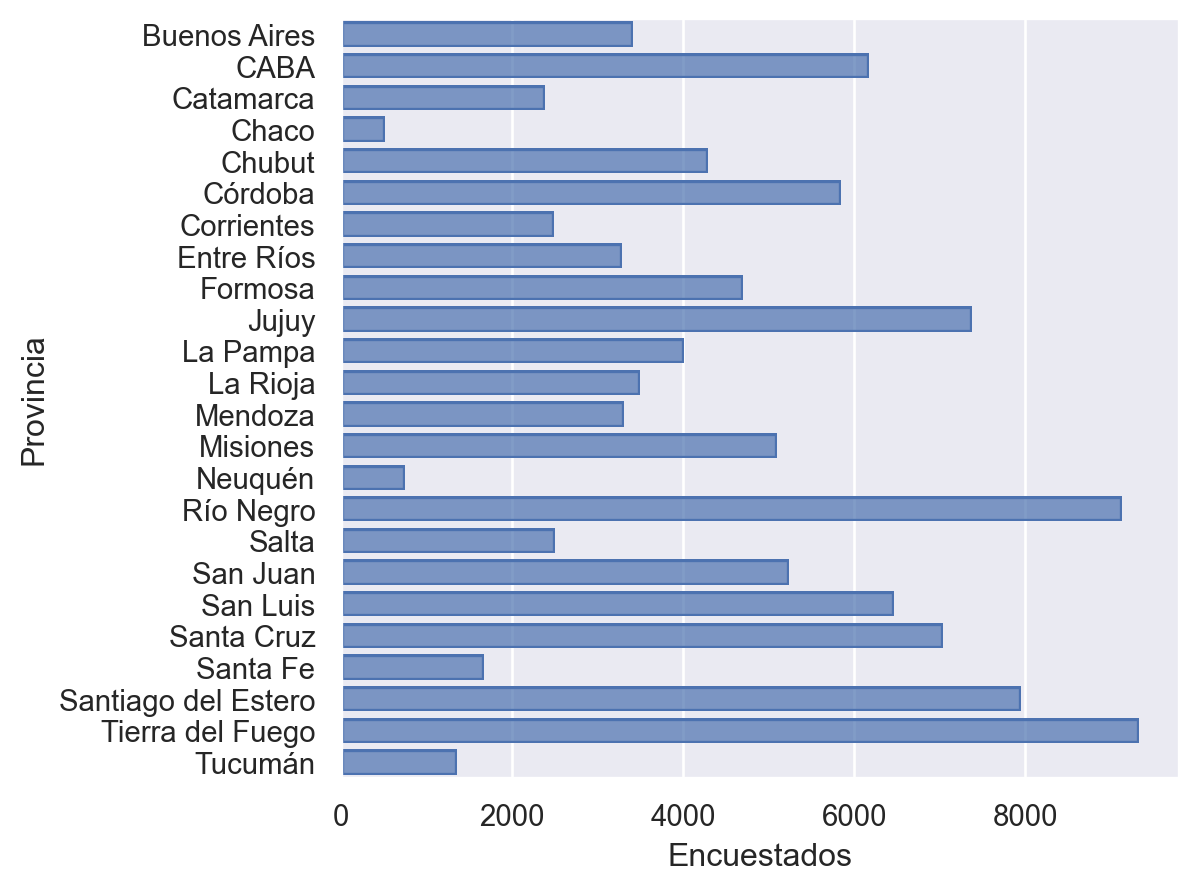

In [11]:
(
    so.Plot(data = df, x = "Encuestados", y = "Provincia")
    .add(so.Bar())
)

11. Estas estudiando la relacion entre altura y peso de las personas. Tenes un data-set que tiene
como variables la edad, sexo y peso de cada persona. Si queres describir estas variables por
separado, ¿que grafico harıas para cada una? ¿y si queres visualizar la relacion entre peso y
altura? Hace a mano en tu cuaderno como esperas que se vea el grafico.

No entiendo como veria la altura si no esta dada... Quizas deberia asumir
1. La altura contra la edad forma una distribucion con una meseta. 
2. Los hombres son mas altos que las mujeres en promedio.
3. El peso es directamente proporcional a la altura. 

12. Hace un grafico de barras que muestre la cantidad de paıses hay en cada continente segun los
datos de `gapminder`, de las siguientes dos formas distintas:

    (a) Calculando primero las cantidades y llamando a `.add(so.Bar())`.

    (b) Utilizando `so.Hist()` para calcular las cantidades.

In [ ]:
paises = gapminder.groupby("continent").nunique("country")["country"]

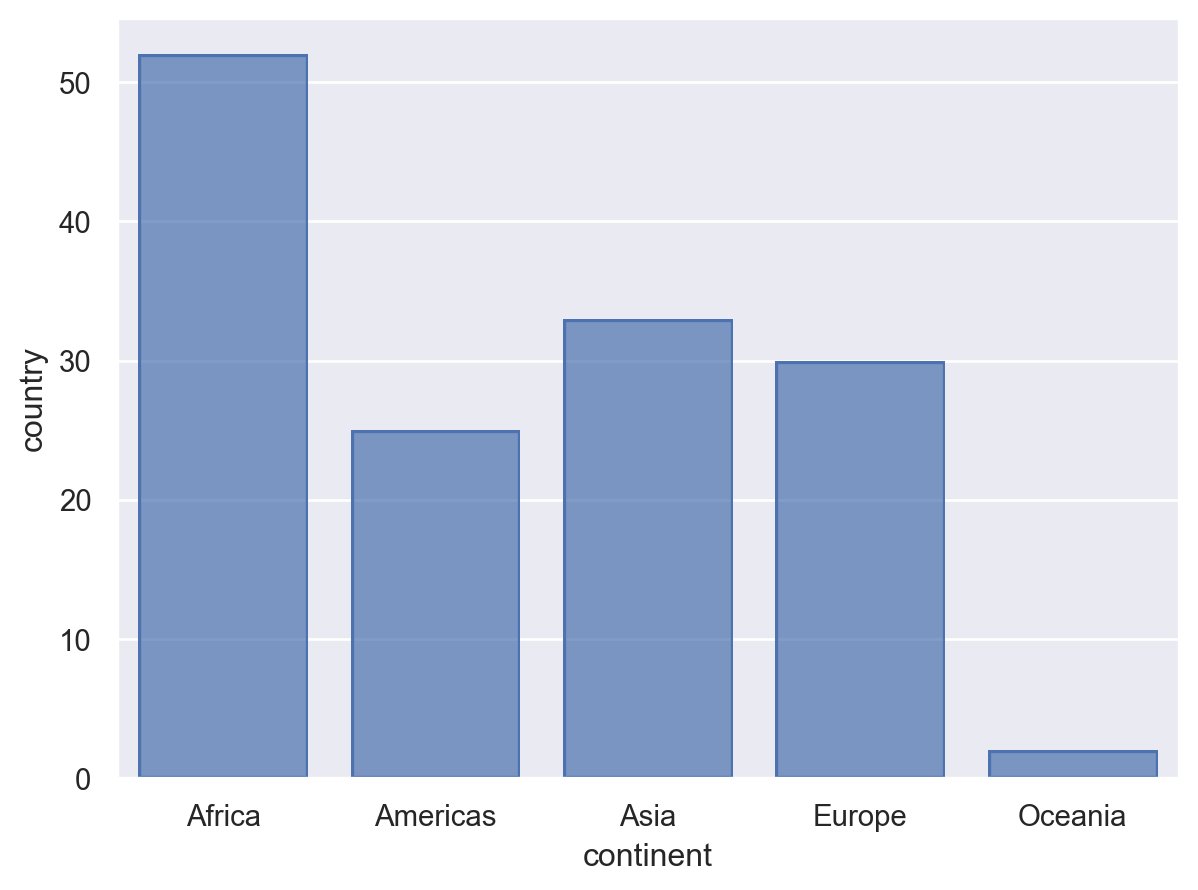

In [18]:
# primer metodo
(
    so.Plot(x = paises.index, y = paises)
    .add(so.Bar())
)

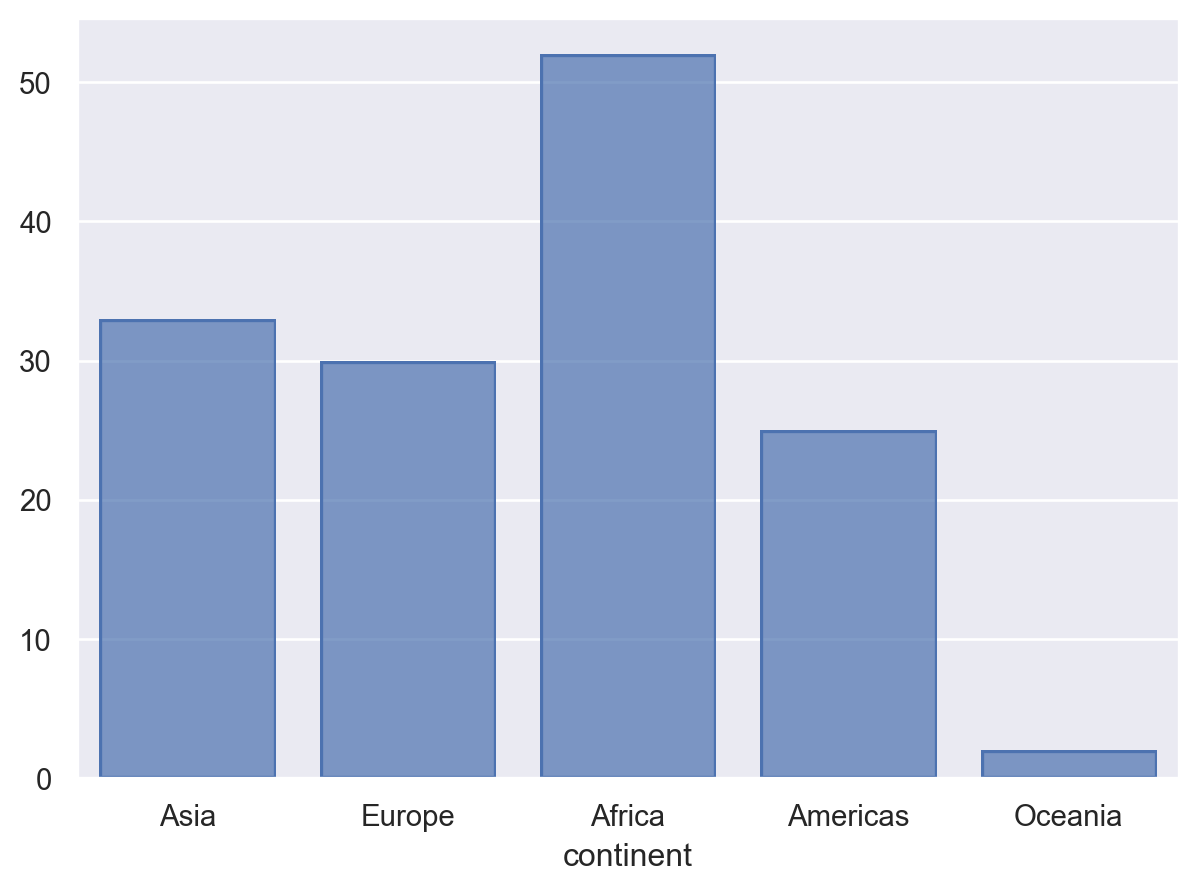

In [ ]:
# segundo metodo 
# filtramos con un año arbitrario para que no hayan paises repetidos
(
    so.Plot(data = gapminder[gapminder["year"] == 2007], x = "continent")
    .add(so.Bar(), so.Hist())
)

13. Queres investigar como varıa la expectativa de vida entre los continentes. Para eso necesitas
un Boxplot. Replicar el de la guia.

<Axes: xlabel='continent', ylabel='lifeExp'>

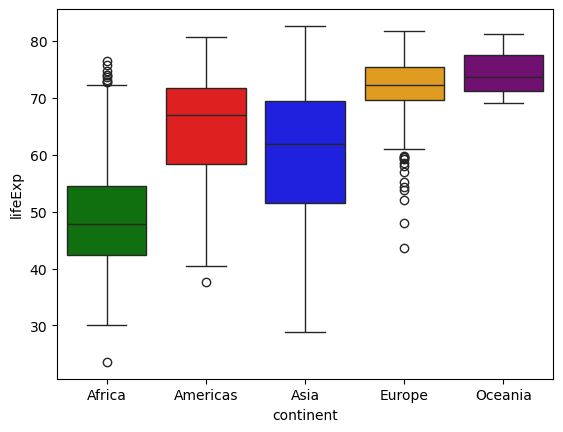

In [ ]:
sns.boxplot(gapminder, x = "continent", y = "lifeExp",
            order=sorted(paises.index), 
            hue="continent", palette=["blue", "orange", "green", "red","purple"]) 
plt.plot()
# realmente me parece good enough, quizas preguntar si hay alguna forma de hacer que los puntos sean mas chicos
